# Inference Module :
The notebook provides a visualization framework for prediction on training set. 

Inputs: Name of network and weight path <br />
Output: visualisation of results


In [1]:
import sys
sys.path.append("../")

In [2]:
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import cv2
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms

from seger.datasets.seg_dataset import LaneDataset
from seger.models.networks import get_network
from seger.metric import IOU,fscore_batch,fscore

In [15]:
config_file = "../cfgs/baseline-8.json"

In [22]:
with open(config_file) as fp:
    cfg = json.load(fp)
    
cfg["data"]["train_data"] = "../" + cfg["data"]["train_data"]
cfg["data"]["valid_data"] = "../" + cfg["data"]["valid_data"]
cfg["data"]["train_root"] = "../" + cfg["data"]["train_root"]
cfg["data"]["label_root"] = "../" + cfg["data"]["label_root"]

cfg["arch"]["arch_kwargs"]["pretrained"] = False

In [27]:
arch_name = cfg["arch"]["arch_name"]
experiment_name = cfg["model_stuff"]["exp_name"]

MODEL_PATH = "../Experiments/{}/best.pth".format(experiment_name)

In [28]:
arch_name

'scnn'

In [29]:
train_dataset = LaneDataset(cfg, augmentations = False , train=True)

In [30]:
model = get_network(cfg["data"]["input_channels"], cfg["data"]["num_classes"], cfg["arch"]["arch_name"], cfg["arch"]["arch_kwargs"])
model.cuda()
model.load_state_dict(torch.load(MODEL_PATH)["model_weights"])

Initializing SCNN...


<All keys matched successfully>

In [31]:
train_choices = np.random.randint(0,len(train_dataset),20)
ious = []

0.19260314393873423


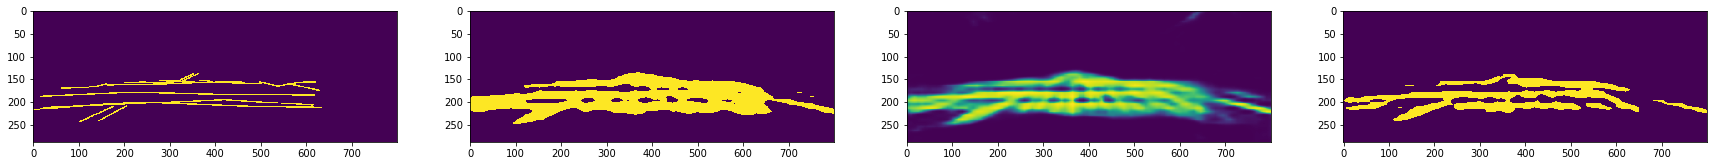

0.2528092403074357


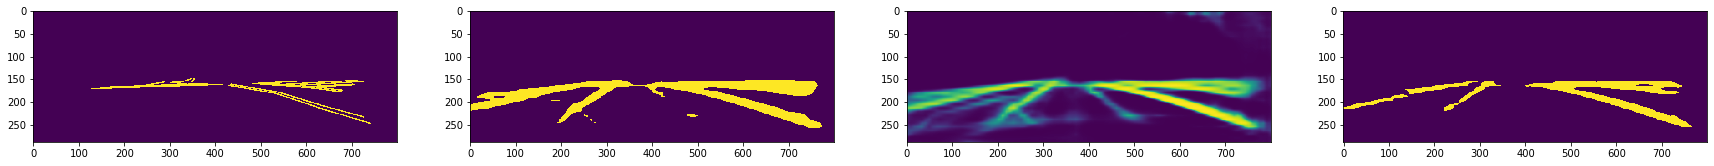

0.11069107007004328


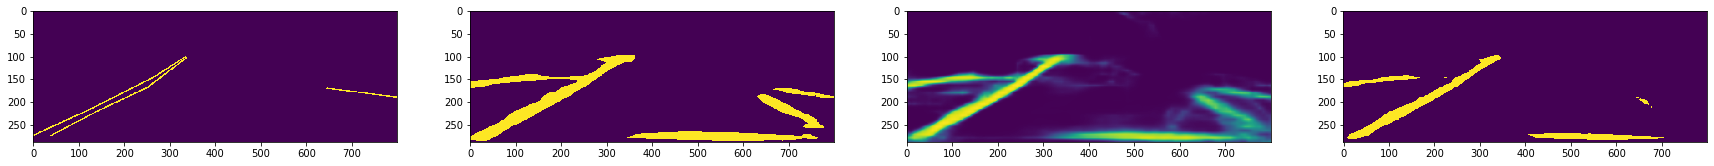

0.21097062107805986


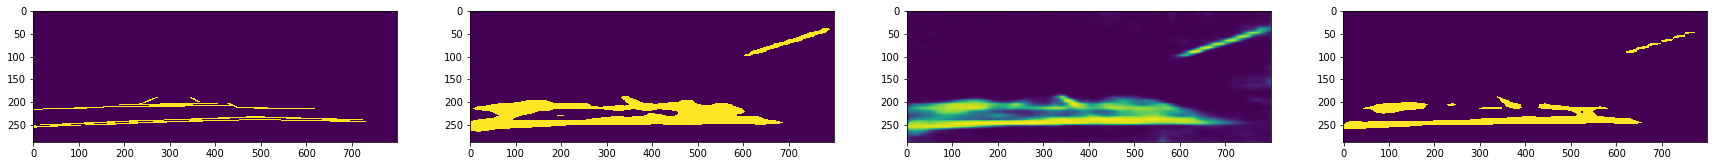

0.11606922739923725


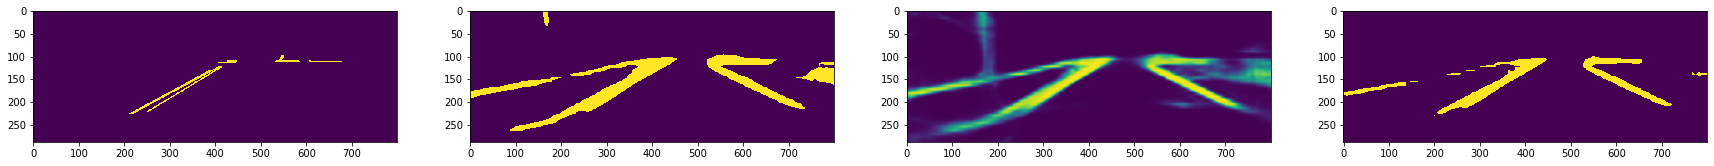

0.2000105186073414


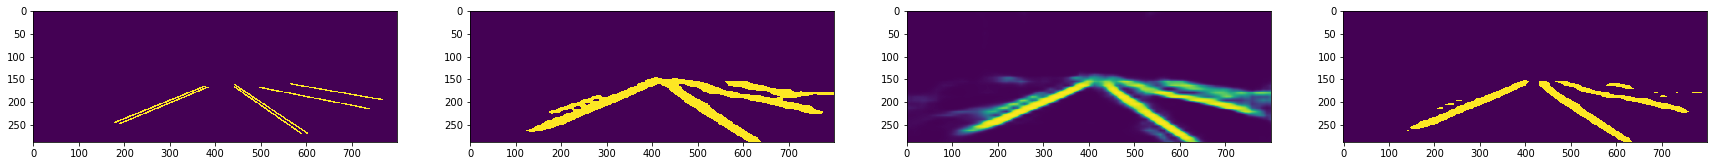

0.2907354112246197


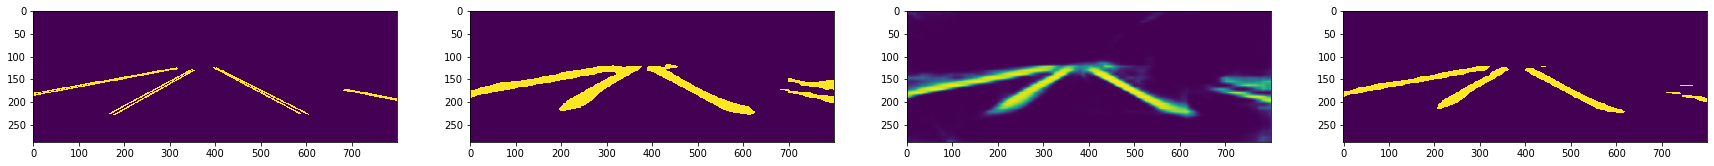

0.23291076317566403


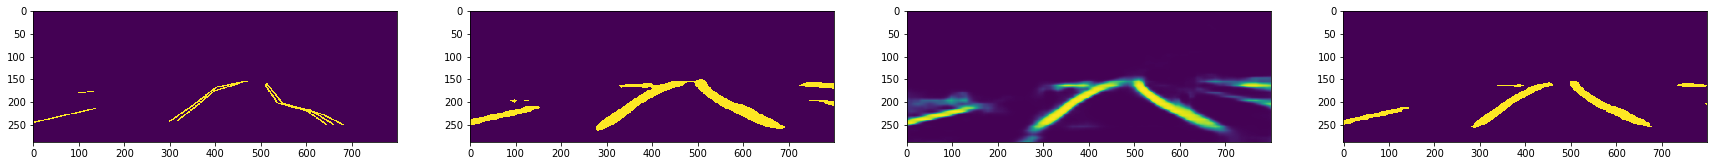

0.22442367606078356


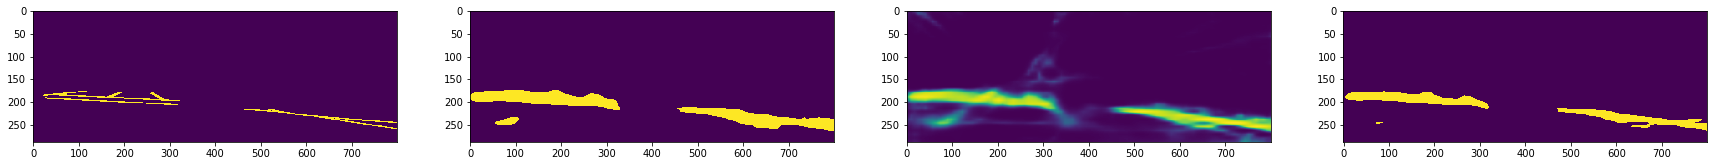

0.23728690608497327


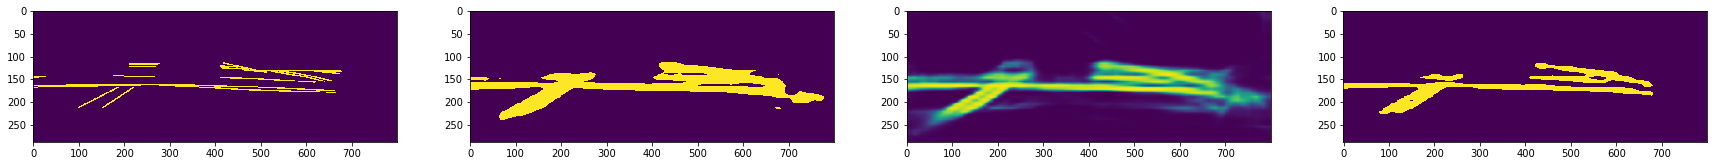

0.08174077595425908


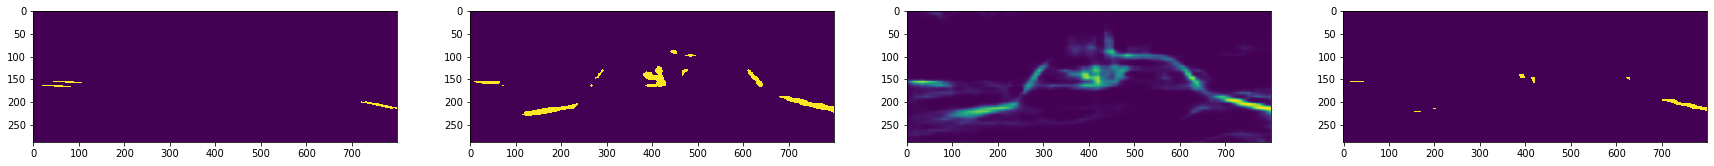

0.06800706819485137


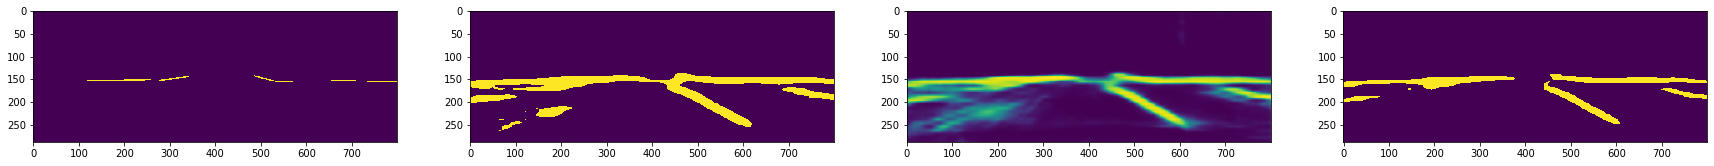

0.14408986095781523


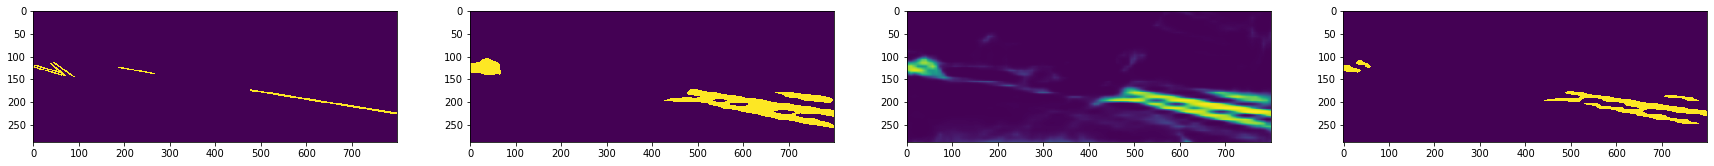

0.22712412680315483


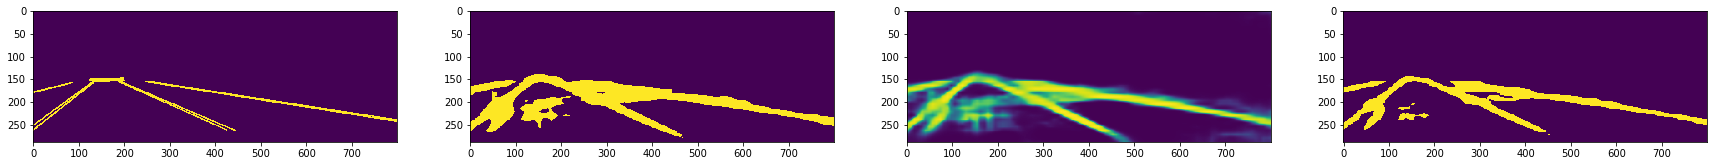

0.22792235917839593


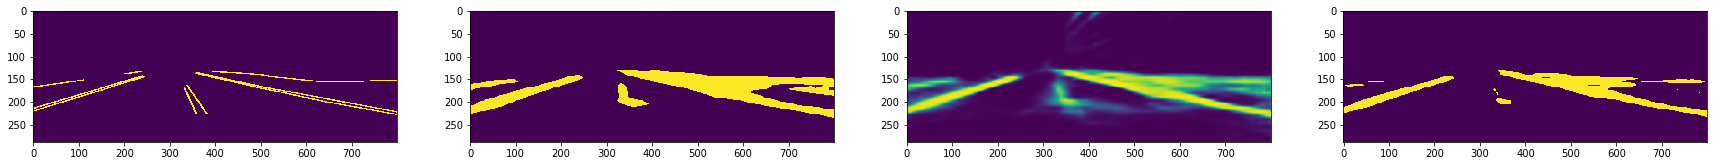

0.23900228755767192


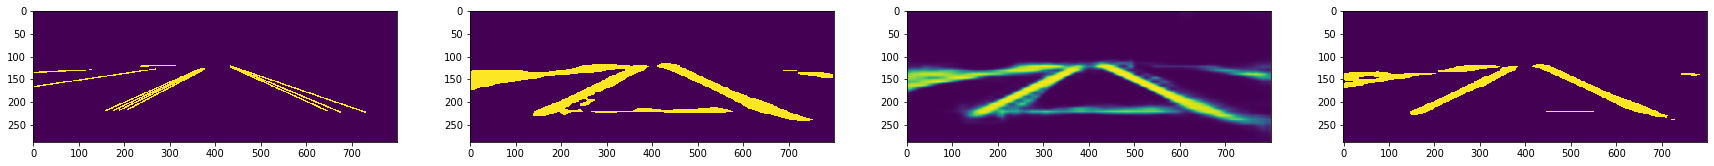

0.17066538712035265


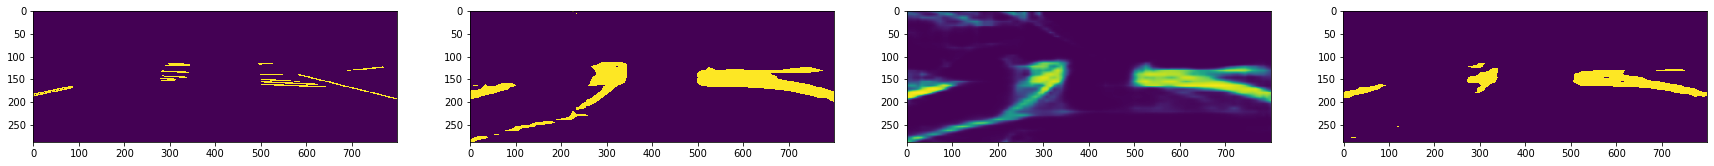

0.10551548209423313


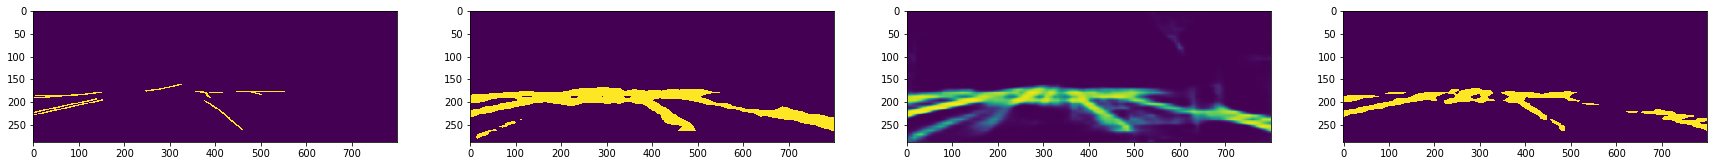

0.03401797206867203


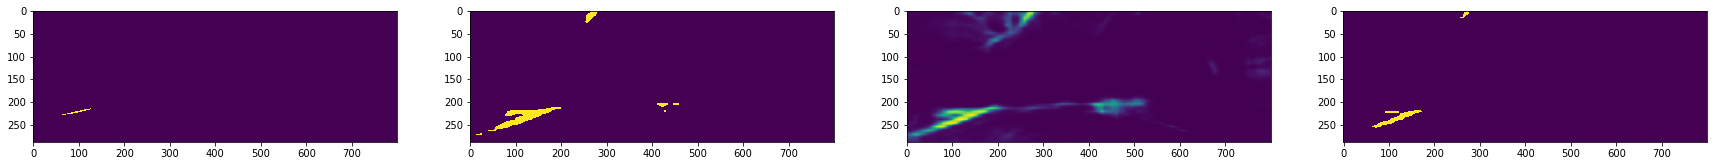

0.2771923956471432


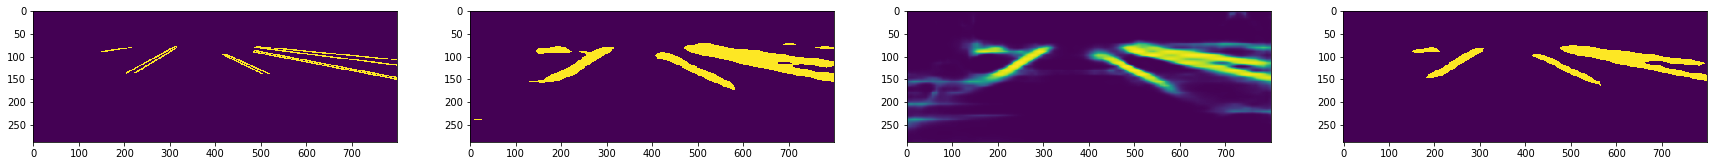

In [32]:

for index in (train_choices):
    
    img,mask = train_dataset[index]
    
    inputs = img.unsqueeze(0).cuda()
    targets = mask.unsqueeze(0).cuda()
       
    outputs = model(inputs)
       
    iou = fscore_batch(targets,outputs)
    print(iou)
    
    prob_map = torch.nn.functional.softmax(outputs,dim=1)
    prob_map = prob_map.squeeze(0)
    prob_map = prob_map.cpu().detach().numpy()
        
    fig = plt.figure(figsize=(30,30))
    ax = []
    ax.append(fig.add_subplot(1,4,1))
    targets = targets.squeeze(0).squeeze(0).cpu().numpy()
    plt.imshow(targets)
    
    ax.append(fig.add_subplot(1,4,2))
    _ , pred = torch.max(outputs,dim=1)
    pred = pred.cpu().numpy()
    plt.imshow(pred[0,:,:])
    
    ax.append(fig.add_subplot(1,4,3))
    plt.imshow(prob_map[1,:,:])
    
    ax.append(fig.add_subplot(1,4,4))
    plt.imshow((prob_map[1,:,:]>0.75))
    
    plt.show()
    
